In [1]:
import pandas as pd  # Correct library for handling data in Python

# Load the dataset from your gist link
df27 = pd.read_csv("https://raw.githubusercontent.com/Reddy-kalwakolu/Activity7_Population/main/BostonHousing.csv")  # Replace YOUR_GIST_LINK_HERE with the actual URL to your dataset

# Display the last few rows of the dataframe
print(df27.tail())


        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          b  lstat  medv  
501  391.99   9.67  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9  


In [2]:
# Basic statistics of the dataset
print(df27.describe())

# Check for any missing values
print(df27.isnull().sum())


             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

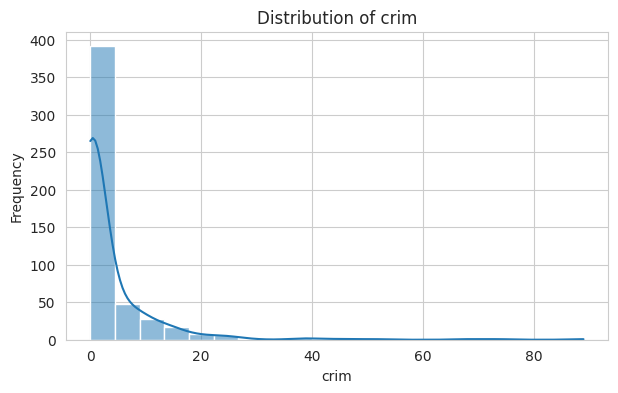

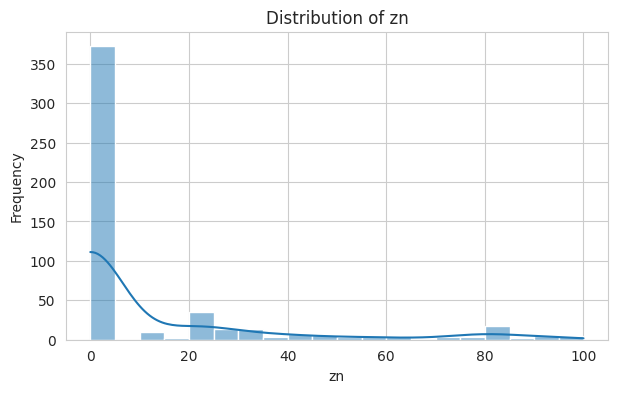

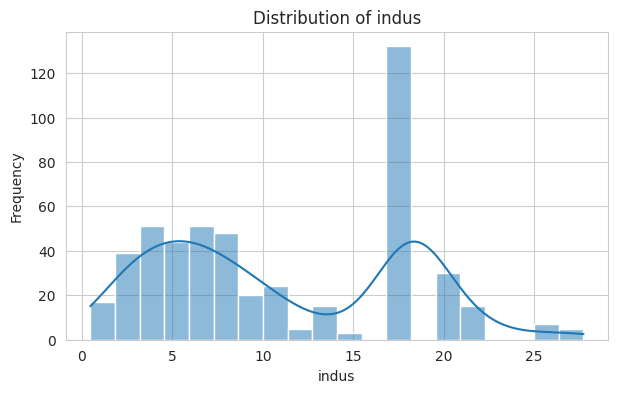

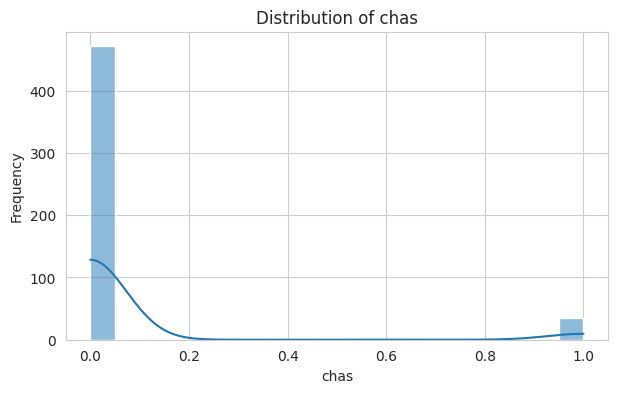

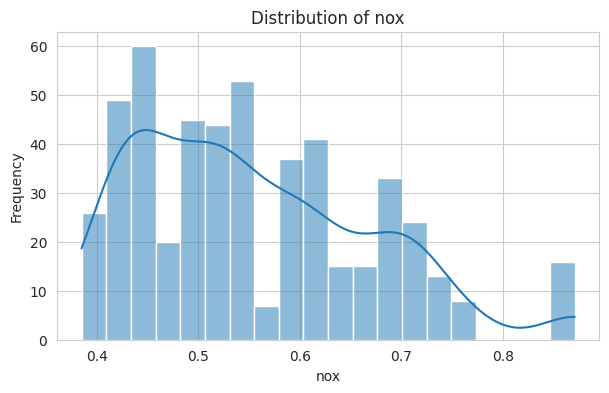

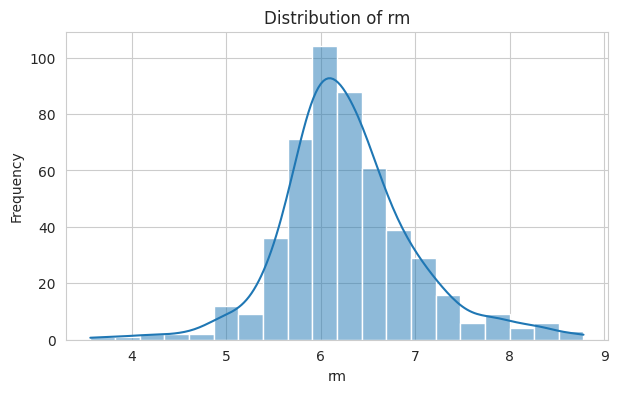

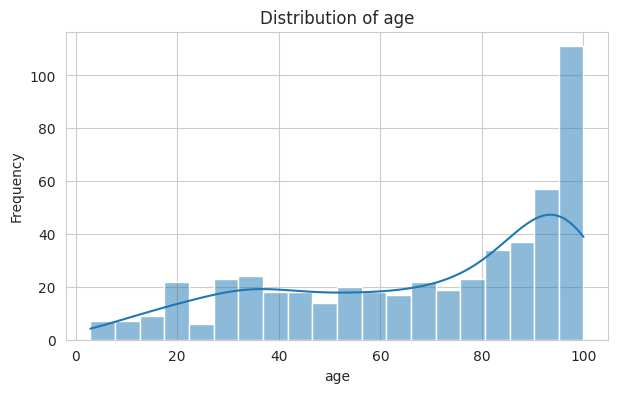

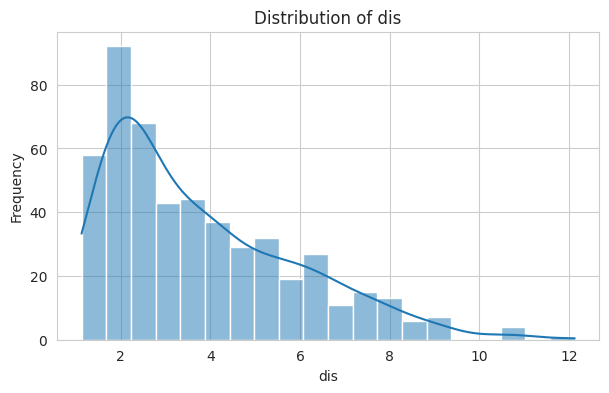

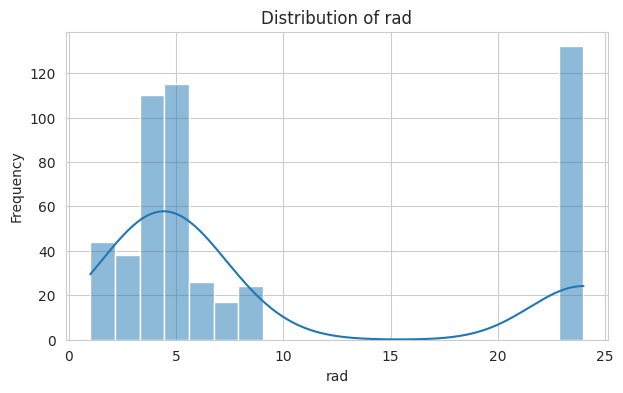

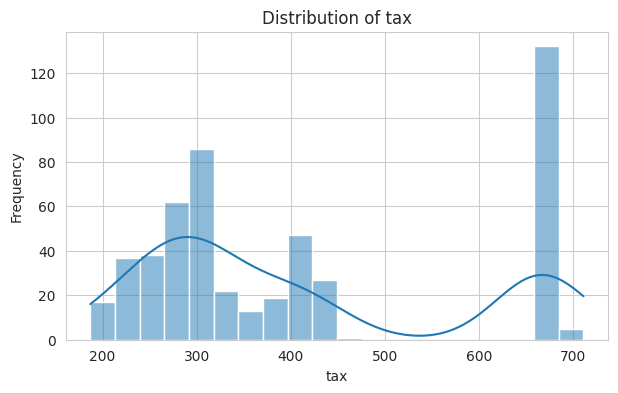

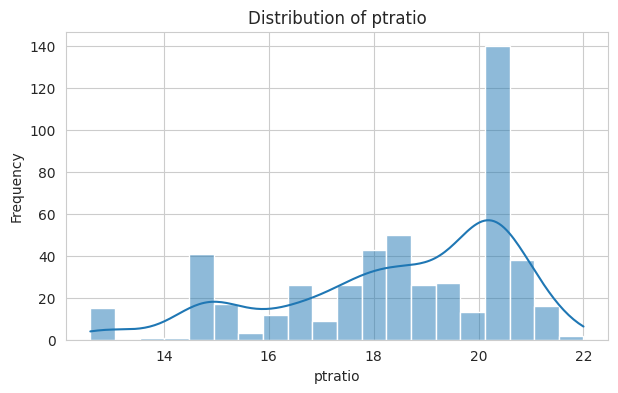

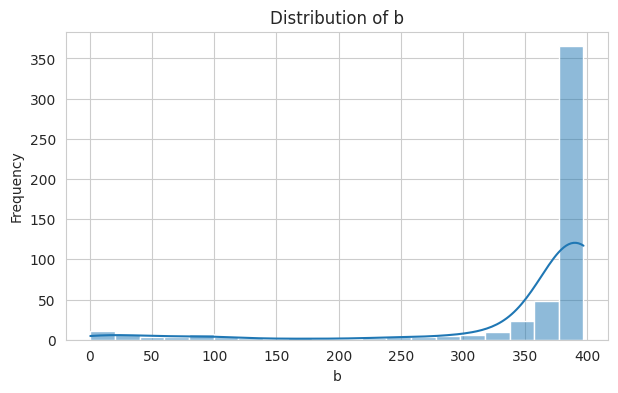

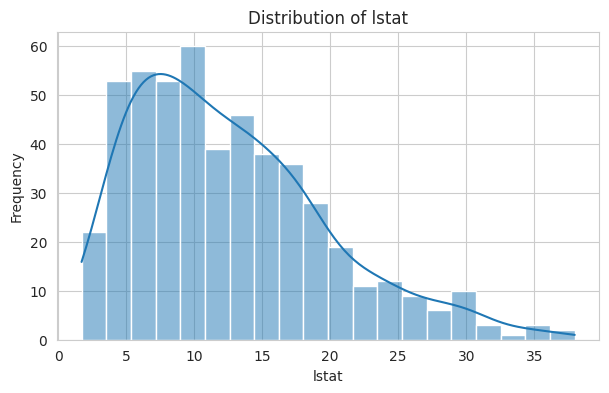

In [3]:

# # Plot the frequency distribution.

import seaborn as sns
import matplotlib.pyplot as plt  # This is the correct import for pyplot

# Set the aesthetic style of the plots
sns.set_style("whitegrid")  # You can choose any style like 'whitegrid', 'darkgrid', 'white', 'dark', 'ticks'

features = df27.columns[:-1]  # Excluding the quality column
for feature in features:
    plt.figure(figsize=(7, 4))
    sns.histplot(df27[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


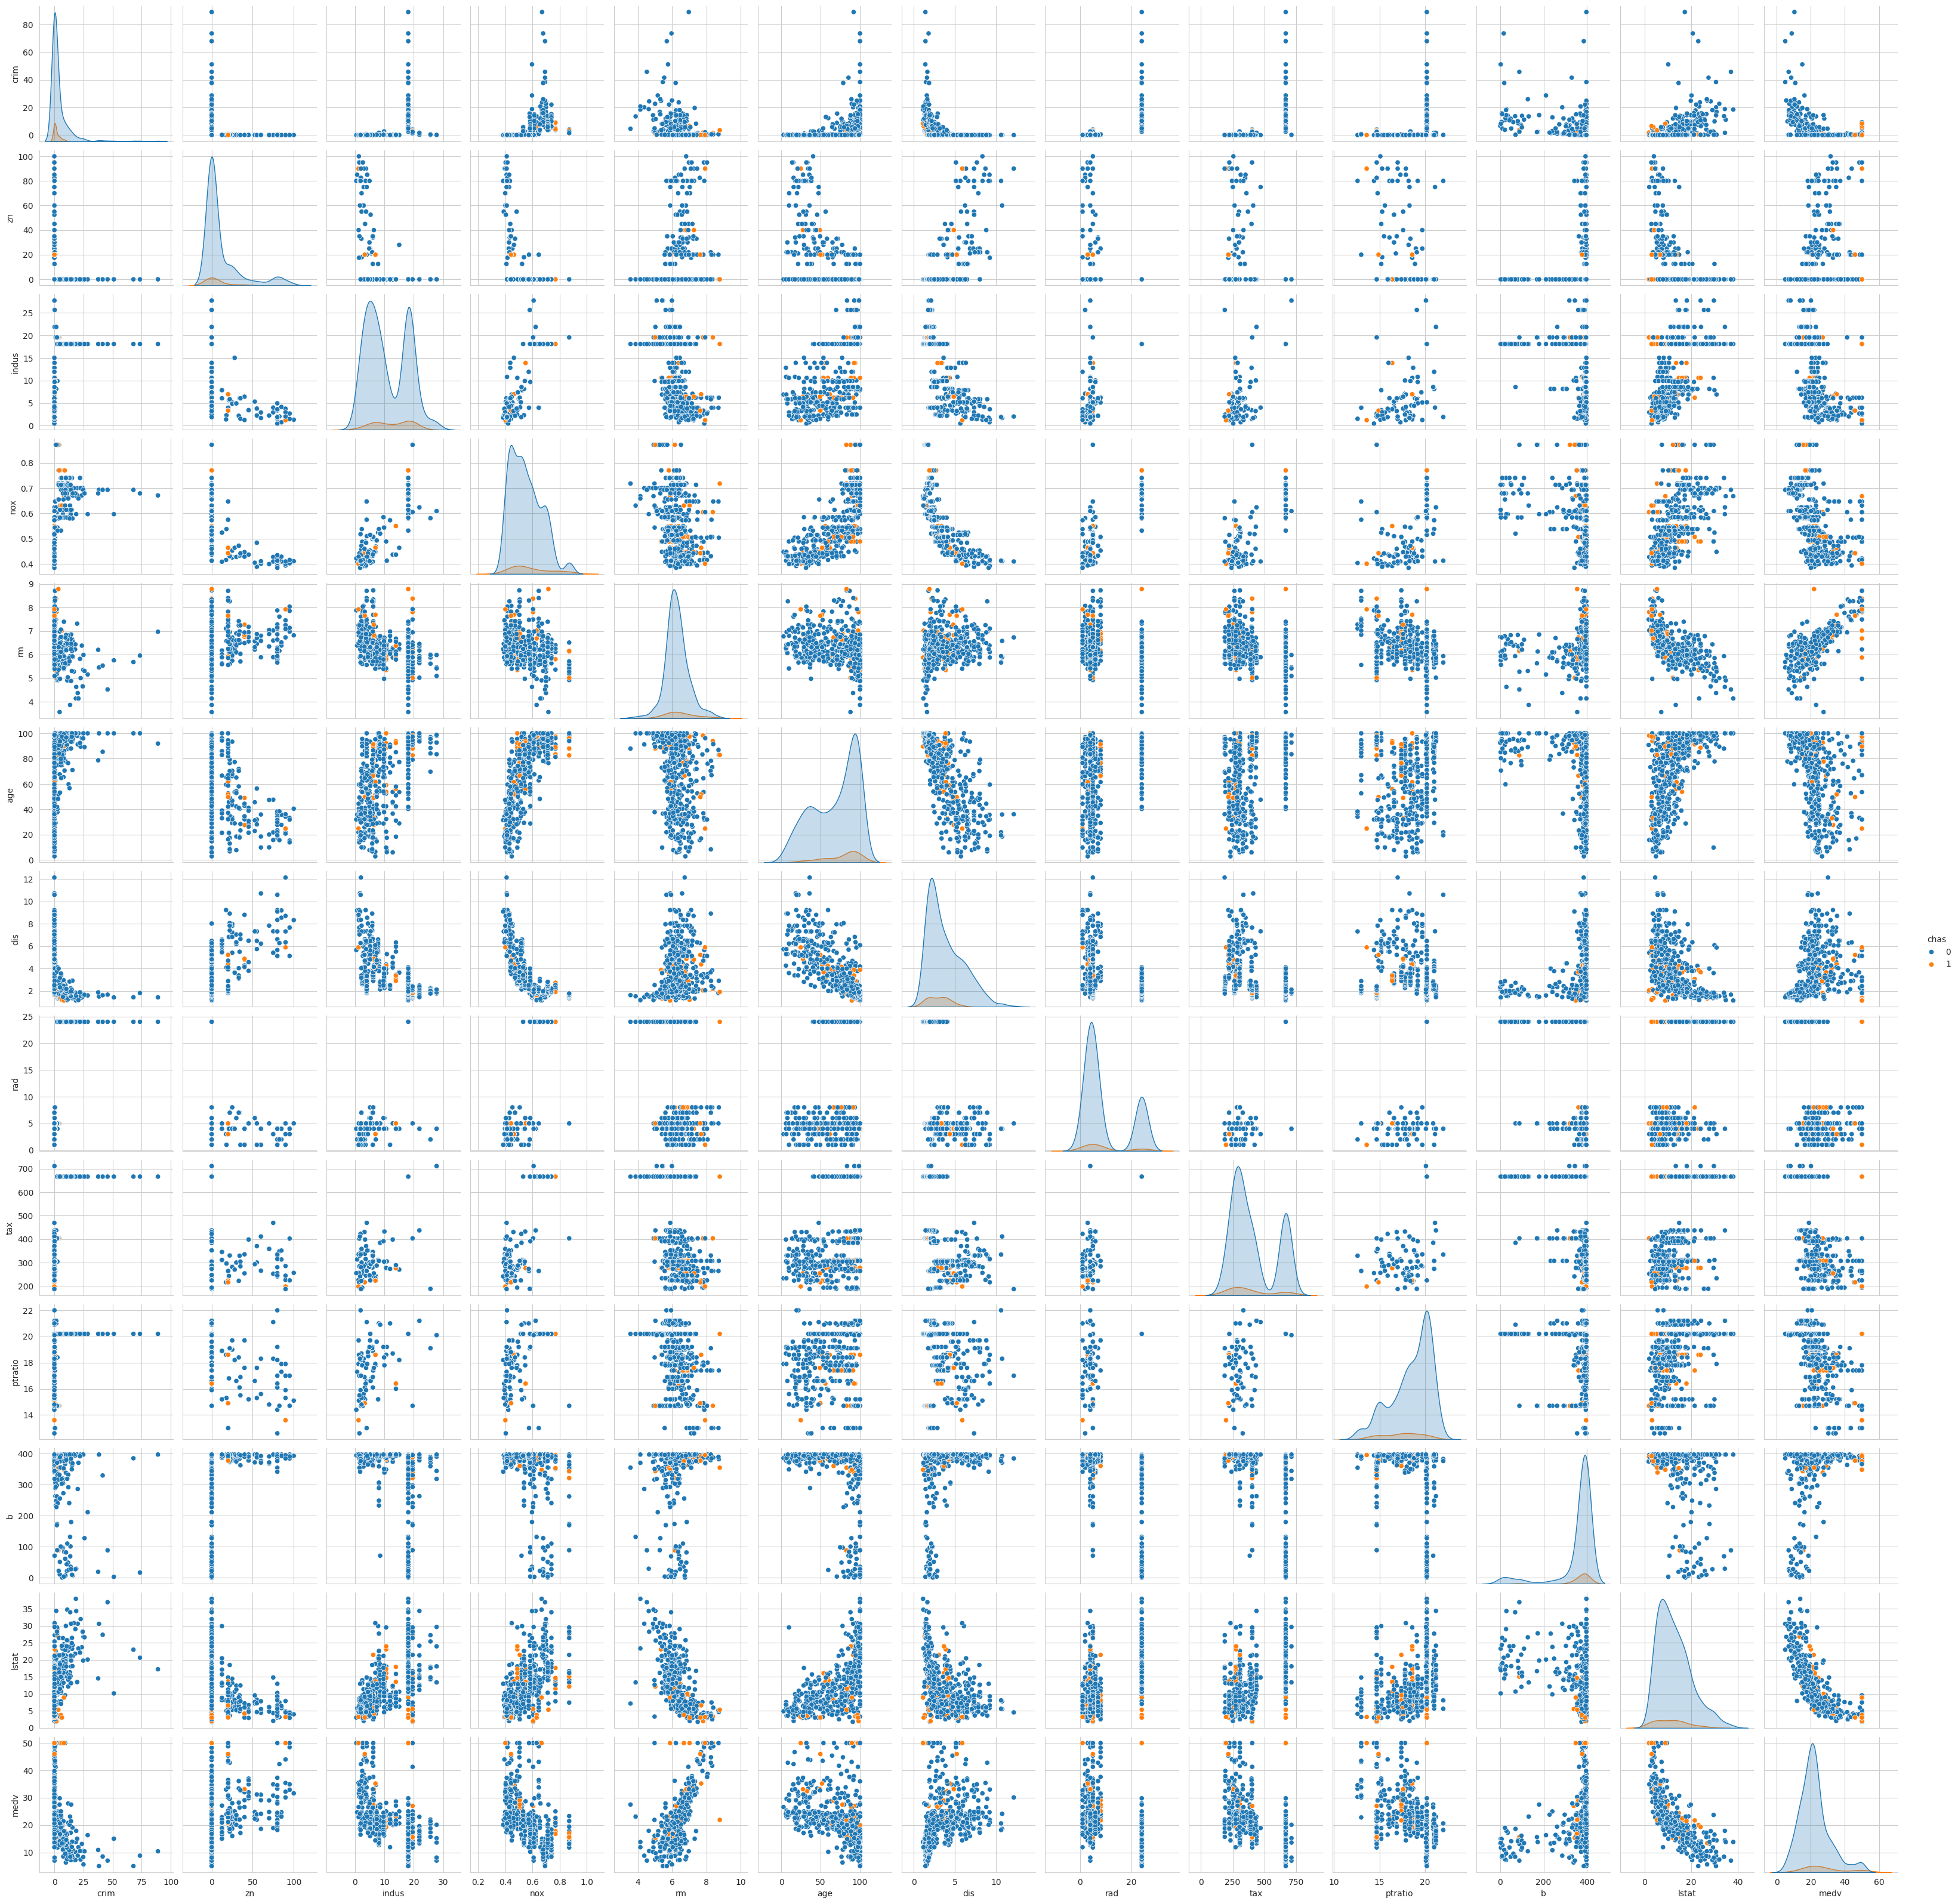

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

# Display the pairplot
sns.pairplot(df27, hue='chas', height=2.5)  # Using 'chas' as the hue and setting the plot height to 2.5
plt.show()


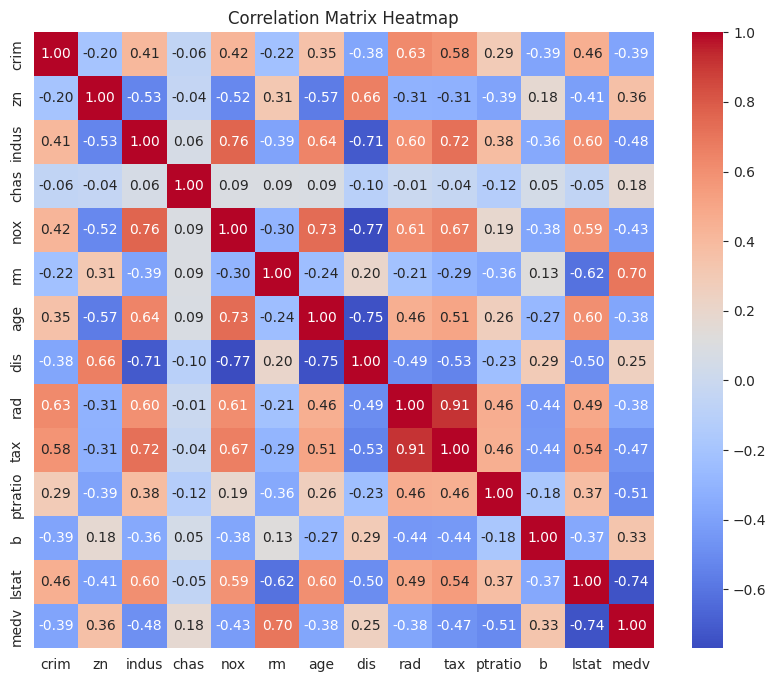

In [5]:
# display the Correlation matrix heatmap below
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df27.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [6]:


import altair as alt

# Define a scatter plot
scatter_plot = alt.Chart(df27).mark_point().encode(
    x='rm',  # For example, using 'rm' (average number of rooms) as x-axis
    y='medv',  # Using 'medv' (median value of homes) as y-axis
    color='chas:N',  # Using 'chas' (Charles River dummy variable) as color, treating it as a nominal variable
)

# Define a bar plot
bar_plot = alt.Chart(df27).mark_bar().encode(
    x='rm',  # Using the same 'rm' (average number of rooms) as x-axis
    y='medv',  # Using 'medv' (median value of homes) as y-axis
    color='chas:N'  # Using 'chas' as color, treating it as a nominal variable
).interactive()  # Makes the bar plot interactive

# Concatenate two plots horizontally
final_plot = alt.hconcat(scatter_plot, bar_plot)  # Use alt.vconcat for vertical concatenation

final_plot  # Display the concatenated plot


alt.HConcatChart(...)

In [7]:


import altair as alt

# Define an interactive scatter plot
scatter_plot = alt.Chart(df27).mark_point().encode(
    x='rm:Q',  # 'rm' (average number of rooms per dwelling), with 'Q' indicating a quantitative scale
    y='medv:Q',  # 'medv' (median value of owner-occupied homes), with 'Q' indicating a quantitative scale
    color='chas:N',  # 'chas' (Charles River dummy variable), with 'N' indicating a nominal scale
).interactive()  # Makes the scatter plot interactive

scatter_plot  # Display the scatter plot


alt.Chart(...)

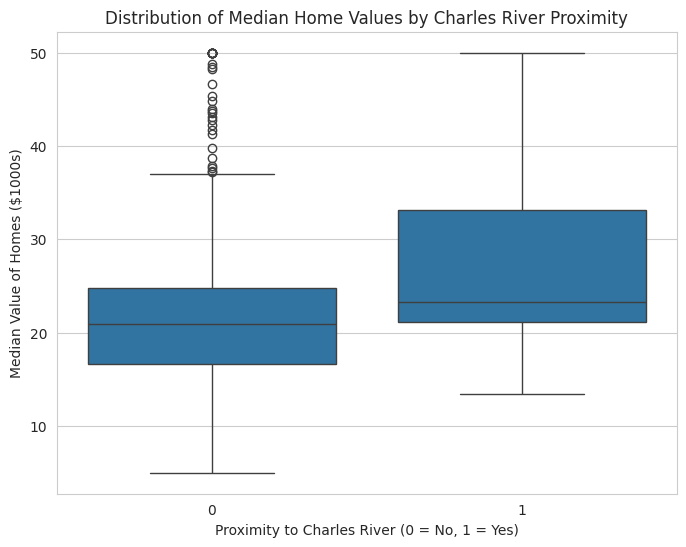

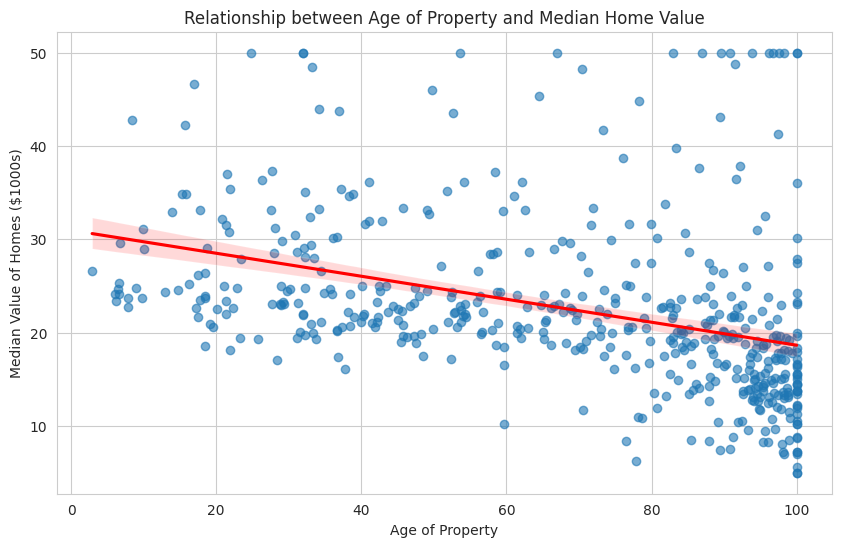

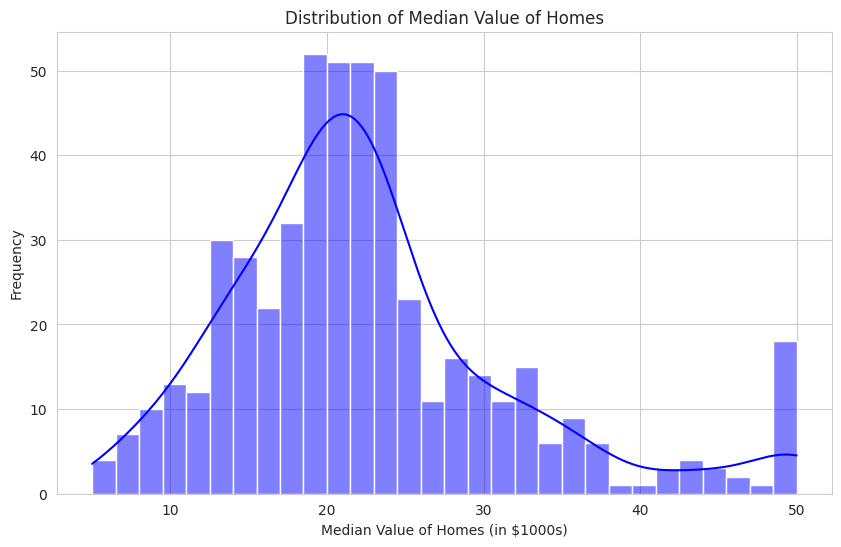

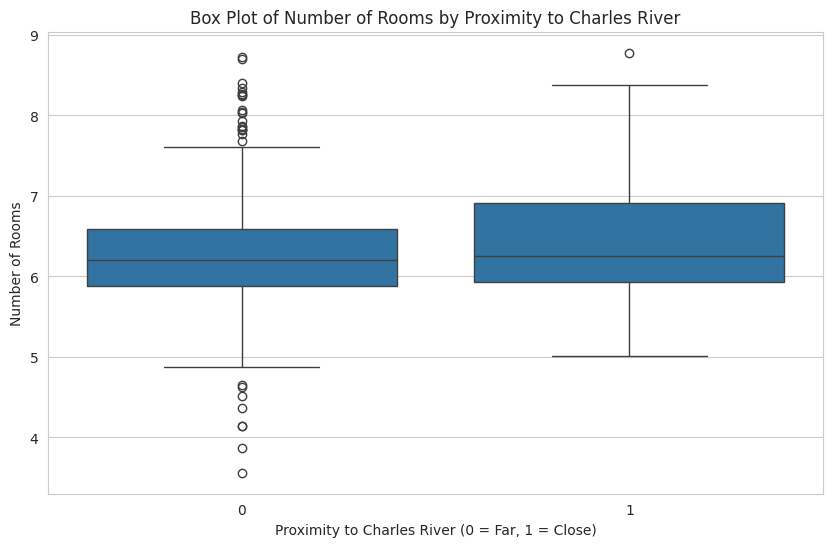

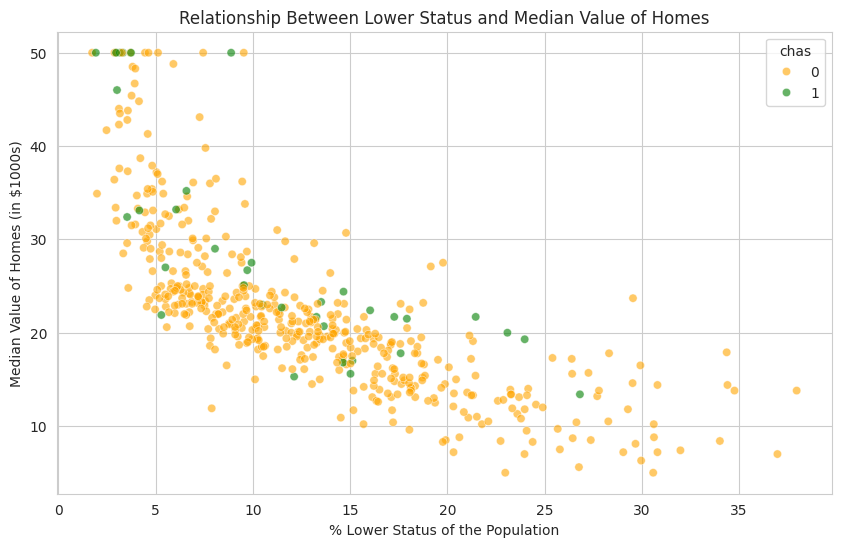

In [8]:
# Display 2-3 visualizations of your choice and attributes are your wish.
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of median values by proximity to Charles River
plt.figure(figsize=(8, 6))
sns.boxplot(x='chas', y='medv', data=df27)
plt.title('Distribution of Median Home Values by Charles River Proximity')
plt.xlabel('Proximity to Charles River (0 = No, 1 = Yes)')
plt.ylabel('Median Value of Homes ($1000s)')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='medv', data=df27, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship between Age of Property and Median Home Value')
plt.xlabel('Age of Property')
plt.ylabel('Median Value of Homes ($1000s)')
plt.show()

# Display 2-3 visualizations of your choice and attributes are your wish.
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style for the visualizations
sns.set_style("whitegrid")

# Visualization 1: Histogram of MEDV - Median value of owner-occupied homes
plt.figure(figsize=(10, 6))
sns.histplot(df27['medv'], bins=30, kde=True, color='blue')
plt.title('Distribution of Median Value of Homes')
plt.xlabel('Median Value of Homes (in $1000s)')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Boxplot of RM by CHAS (Charles River dummy variable)
plt.figure(figsize=(10, 6))
sns.boxplot(x='chas', y='rm', data=df27)
plt.title('Box Plot of Number of Rooms by Proximity to Charles River')
plt.xlabel('Proximity to Charles River (0 = Far, 1 = Close)')
plt.ylabel('Number of Rooms')
plt.show()



# Visualization 3: Scatter plot of LSTAT vs. MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lstat', y='medv', hue='chas', data=df27, palette=['orange', 'green'], alpha=0.6)
plt.title('Relationship Between Lower Status and Median Value of Homes')
plt.xlabel('% Lower Status of the Population')
plt.ylabel('Median Value of Homes (in $1000s)')
plt.show()




In [9]:
# Start coding here
import altair as alt

# Scatter plot of RM vs MEDV
scatter_rm_medv = alt.Chart(df27).mark_circle(size=60).encode(
    alt.X('rm:Q', title='Average Number of Rooms'),
    alt.Y('medv:Q', title='Median Value of Homes ($1000s)'),
    color=alt.Color('chas:N', legend=alt.Legend(title="Proximity to Charles River"), scale=alt.Scale(scheme='set2')),
    tooltip=['rm', 'medv', 'chas']
).interactive()

# Scatter plot of AGE vs MEDV
scatter_age_medv = alt.Chart(df27).mark_circle(size=60).encode(
    alt.X('age:Q', title='Proportion of Units Built Prior to 1940'),
    alt.Y('medv:Q', title='Median Value of Homes ($1000s)'),
    color=alt.Color('chas:N', legend=alt.Legend(title="Proximity to Charles River"), scale=alt.Scale(scheme='set2')),
    tooltip=['age', 'medv', 'chas']
).interactive()

# Concatenate the plots with shared interactive legend
concatenated_plots = alt.hconcat(scatter_rm_medv, scatter_age_medv).resolve_legend(
    color="independent"
)

# Display the concatenated plots
concatenated_plots


alt.HConcatChart(...)